In [55]:
# Plot density and temperature panel
# of PLUTO simulation
# Author: Roberto Alfano

######################## imports ########################
import os
import sys
import matplotlib as mpl
from matplotlib import colors
from matplotlib import pyplot as plt
import pyPLUTO as pypl
import pyPLUTO.pload as pp
import pyPLUTO.Image as img
import pandas as pd
import contextlib
from tqdm import tqdm
import numpy as np
import argparse

######################## constants, fixed variables, unit measures ########################

mu = 1.2889425		#mean molecular weight			
ti = 0				#initial time
ud = 1.67262171e-24		#unit density (g)
ul = 3.0856775807e18		#unit length (cm)
uv = 1.e8			#unit velocity (cm/s)
up = (uv**2)*ud			#unit pressure (dyn/cm^2)
umag = uv*np.sqrt(4*np.pi*ud)	#unit magnetic field (G)
utyrs = (ul/uv)*3.17098e-8	#unit time (yrs)
kb = 1.3806505e-16		#Boltzmann constant in cgs
mp = 1.67262171e-24		#Mass of the proton in cgs

filenum = 0
################################################

plt.rcParams.update({
		"text.usetex": True,
		"font.family": "sans-serif",
		"font.sans-serif": "Helvetica",
	"font.size": 10
})
plt.rc('font',weight='bold')
plt.rcParams['text.latex.preamble']=r'\usepackage{sfmath} \boldmath'

dirpath = os.getcwd()+'/'

props = dict(boxstyle='round',facecolor=None, alpha=0.0, edgecolor='white')	# properties of textbox

################################################

In [56]:
def lineToData(line):
    return (int(line[0]),float(line[1]))

def readData(fileName):
    data = []
    with open(fileName) as f:
        for line in f.readlines():
            data.append(lineToData(line.split()))
    return data

In [78]:
info = readData(dirpath+'dbl.out')
info[0][1]

0.817538

In [58]:
rho_img = np.zeros((512,512,7))
temp_img = np.zeros((512,512,7))
for filenum,i in zip([0,10,20,30,40,50,56],range(7)):
    D = pp.pload(filenum, w_dir=dirpath, datatype='dbl')
    if(i==0): x1,x2=np.meshgrid(D.x1,D.x2)
    rho_img[:,:,i] = D.rho.T[256,:,:]
    temp_img[:,:,i] = D.prs.T[256,:,:]*up*mu*ud/(D.rho.T[256,:,:]*ud*kb)
    del D
rho_img.tofile("rho_img.npy")
temp_img.tofile("temp_img.npy")

Reading multiple variable files : /home/roberto/Desktop/pres/ver_12/rho.0000.dbl
Reading multiple variable files : /home/roberto/Desktop/pres/ver_12/prs.0000.dbl
Reading multiple variable files : /home/roberto/Desktop/pres/ver_12/rho.0010.dbl
Reading multiple variable files : /home/roberto/Desktop/pres/ver_12/prs.0010.dbl
Reading multiple variable files : /home/roberto/Desktop/pres/ver_12/rho.0020.dbl
Reading multiple variable files : /home/roberto/Desktop/pres/ver_12/prs.0020.dbl
Reading multiple variable files : /home/roberto/Desktop/pres/ver_12/rho.0030.dbl
Reading multiple variable files : /home/roberto/Desktop/pres/ver_12/prs.0030.dbl
Reading multiple variable files : /home/roberto/Desktop/pres/ver_12/rho.0040.dbl
Reading multiple variable files : /home/roberto/Desktop/pres/ver_12/prs.0040.dbl
Reading multiple variable files : /home/roberto/Desktop/pres/ver_12/rho.0050.dbl
Reading multiple variable files : /home/roberto/Desktop/pres/ver_12/prs.0050.dbl
Reading multiple variable fi

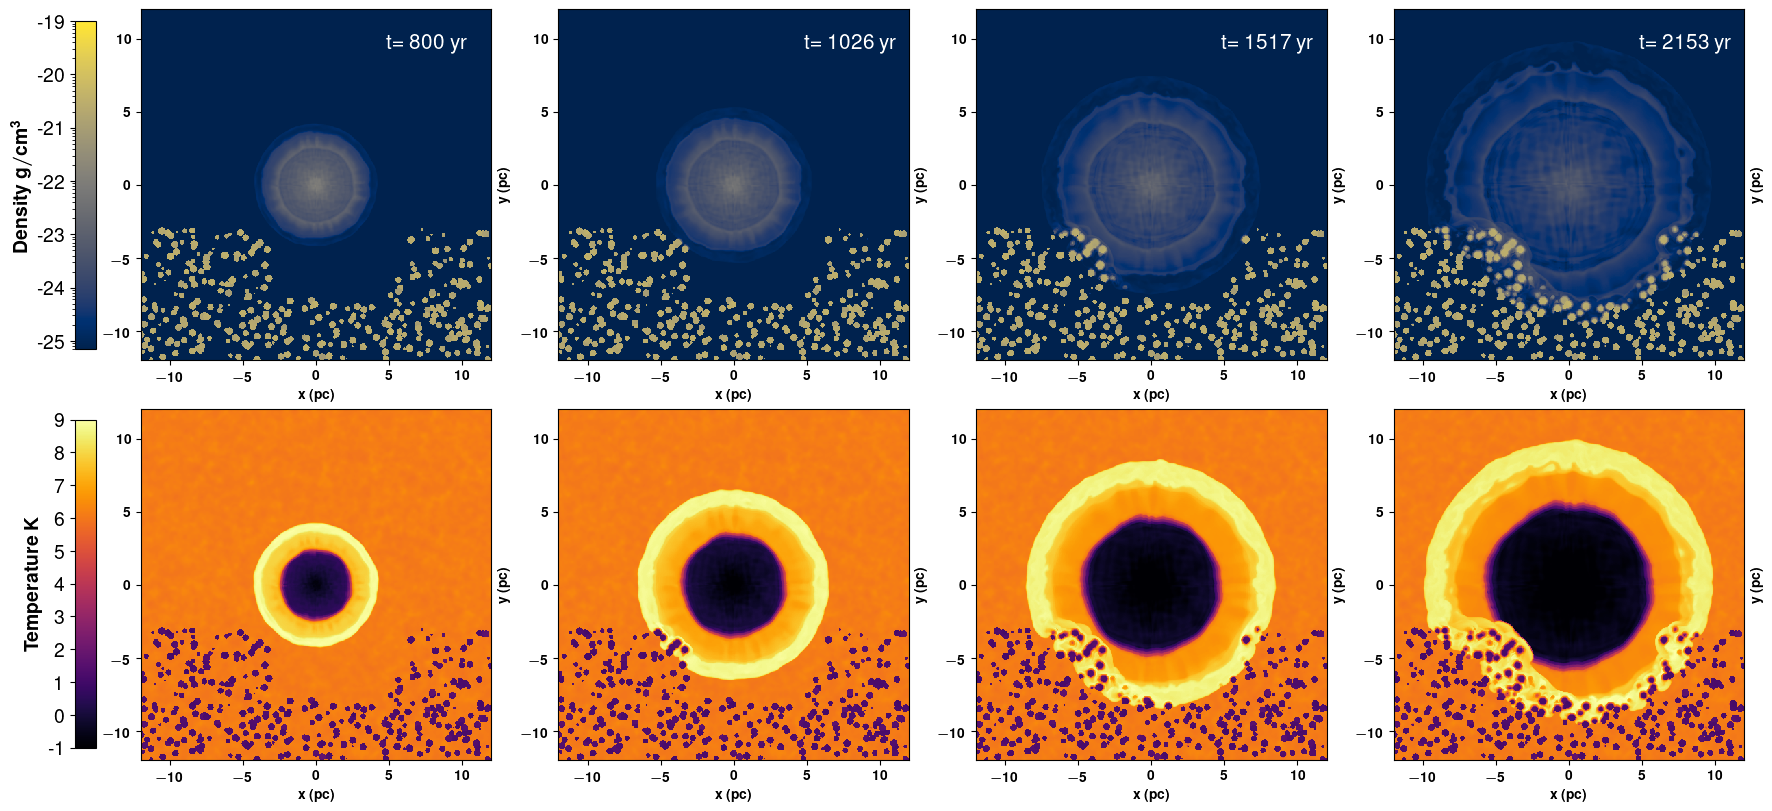

In [91]:
from itertools import chain
from matplotlib.ticker import LogLocator, FuncFormatter
def log_tick_formatter(val, pos):
    return r"{:.0f}".format(np.log10(val))

rho = np.fromfile("rho_img.npy").reshape((512,512,7))   
temp = np.fromfile("temp_img.npy").reshape((512,512,7))   

#figure
fig, ax = plt.subplots(2,4,figsize=(22,8),layout="compressed")
l = chain.from_iterable(zip(*ax))
im1 = ax[0,0].pcolormesh(x1,x2,(rho[:,:,0]*ud),cmap='cividis', norm=colors.LogNorm(vmin=7.e-26,vmax=1.e-19))
im2 = ax[0,1].pcolormesh(x1,x2,(rho[:,:,1]*ud),cmap='cividis', norm=colors.LogNorm(vmin=7.e-26,vmax=1.e-19))
im3 = ax[0,2].pcolormesh(x1,x2,(rho[:,:,3]*ud),cmap='cividis', norm=colors.LogNorm(vmin=7.e-26,vmax=1.e-19))
im4 = ax[0,3].pcolormesh(x1,x2,(rho[:,:,6]*ud),cmap='cividis', norm=colors.LogNorm(vmin=7.e-26,vmax=1.e-19))

im5 = ax[1,0].pcolormesh(x1,x2,(temp[:,:,0]),cmap='inferno', norm=colors.LogNorm(vmin=1.e-1,vmax=1.e9))
im6 = ax[1,1].pcolormesh(x1,x2,(temp[:,:,2]),cmap='inferno', norm=colors.LogNorm(vmin=1.e-1,vmax=1.e9))
im7 = ax[1,2].pcolormesh(x1,x2,(temp[:,:,4]),cmap='inferno', norm=colors.LogNorm(vmin=1.e-1,vmax=1.e9))
im8 = ax[1,3].pcolormesh(x1,x2,(temp[:,:,6]),cmap='inferno', norm=colors.LogNorm(vmin=1.e-1,vmax=1.e9))

for axi in l:
    axi.set_aspect('equal')
    axi.set_xlabel(r'\textbf{x (pc)}')
    axi.set_ylabel(r'\textbf{y (pc)}')
    axi.yaxis.set_label_position("right")

for i,j in zip(range(0,4),[0,10,30,56]):
    ax[0,i].text(0.7, 0.93, r't= {:.0f} yr'.format((info[j][1])*utyrs),
             fontsize=15, transform=ax[0,i].transAxes, verticalalignment='top', color='white')
#ax1.set_position([0.08, 0.14, 0.65, 0.65])

#ax1.set_xlabel(r'$y$ \textbf{(pc)}')
#ax1.set_ylabel(r'$z$ \textbf{(pc)}')
# ax1.yaxis.tick_right()
# ax1.yaxis.set_label_position("right")

#ax[0,0].text(0.7, 0.93, r'$$\mathbf{M = 15M_\odot}$$', transform=ax[0,0].transAxes, fontsize=14, verticalalignment='top', bbox=props, color='white')
#ax[1,0].text(0.7, 0.93, r'$$\mathbf{M = 15M_\odot}$$', transform=ax[1,0].transAxes, fontsize=14, verticalalignment='top', bbox=props, color='black')

#colorbar
cax1 = fig.add_axes([0.11,0.57,0.0095,0.41])
cb = plt.colorbar(im1,
cax=cax1,
orientation='vertical',location='left')
cb.set_label(r'\textbf{Density} $\mathbf{g/cm^3}$',fontsize=14)
cb.ax.yaxis.set_major_locator(LogLocator(base=10.0, subs=[], numticks=10))
cb.ax.yaxis.set_major_formatter(FuncFormatter(log_tick_formatter))
cb.ax.tick_params(labelsize=14)

cax2 = fig.add_axes([0.11,0.072,0.0095,0.41])
cb2 = plt.colorbar(im5,
cax=cax2,
orientation='vertical',location='left')
cb2.set_label(r'\textbf{Temperature K}',fontsize=14)
cb2.ax.yaxis.set_major_locator(LogLocator(base=10.0, subs=[], numticks=10))
cb2.ax.yaxis.set_major_formatter(FuncFormatter(log_tick_formatter))
cb2.ax.tick_params(labelsize=14)

plt.savefig("evolution_15m1f.png",bbox_inches='tight')